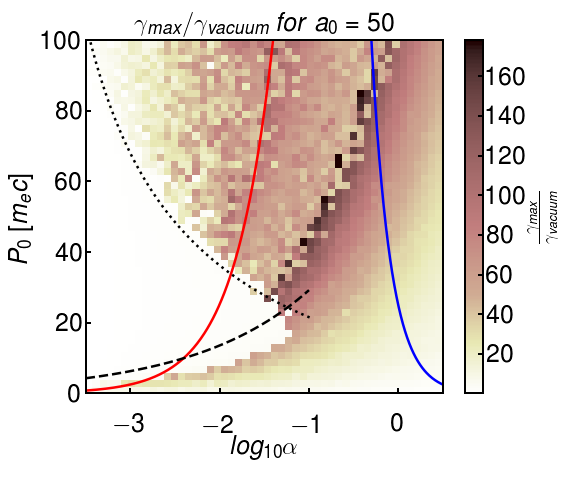

In [4]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
#import os
#import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
#from colour import Color

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
		'weight' : 'normal',
        'size'   : 25,
	   }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
#print 'electric field unit: '+str(exunit)
#print 'magnetic field unit: '+str(bxunit)
#print 'density unit nc: '+str(denunit)



ex=np.loadtxt('./txt/enhance.txt')
axis_b=np.loadtxt('./txt/axis_b.txt')
axis_a=np.loadtxt('./txt/axis_p.txt')
x,y=np.meshgrid(axis_b,axis_a)
ex=ex*(50.0**2/2.0)/(50.0**2/(y+2.0))
#ex=ex*(150**2.0+1.0)/(200.0**2+1.0)
levels = np.linspace(np.min(ex.T), np.max(ex.T), 40)
#levels = np.linspace(0.0, 3.1, 40)
#plt.contourf(x, y, ex, levels=levels, cmap=cm.pink_r, antialiased=False)
#plt.pcolormesh(x, y, ex, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=np.min(ex.T), vmax=np.max(ex.T)), cmap=cm.pink_r)
norm = MidpointNormalize(midpoint=50)
plt.pcolormesh(x, y, ex.T, norm=norm, cmap=cm.pink_r)

plt.axis([x.min(), x.max(), y.min(), y.max()])
#### manifesting colorbar, changing label and axis properties ####
cbar=plt.colorbar()#ticks=[np.min(ex), -eee/2, 0, eee/2, np.min()])
cbar.set_label(r'$\frac{\gamma_{max}}{\gamma_{vacuum}}$',fontdict=font)        
a0=50.0
alpha=np.linspace(-3.5,0.5,501)

p0=(0.01*a0/2.0/(10.0**alpha))**2
p1=(0.05*a0/2.0/(10.0**alpha))**2
p2=(0.20*a0/2.0/(10.0**alpha))**2
p3=(0.35*a0/2.0/(10.0**alpha))**2

#plt.plot(alpha,p0,'-r',linewidth=1.5,label=r'$B_{max}=0.01a_0$')
#plt.plot(alpha,p1,'-g',linewidth=1.5,label=r'$B_{max}=0.05a_0$')
plt.plot(alpha,p2,'-b',linewidth=2.5,label=r'$B_{max}=0.20a_0$')
#plt.plot(alpha,p3,'-b',linewidth=3.5,label=r'$B_{max}=0.35a_0$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 12})

p0=(2*np.pi*2.5)**2*(10.0**alpha)
p1=(2*np.pi*5.0)**2*(10.0**alpha)
p2=(2*np.pi*8.0)**2*(10.0**alpha)
#p3=(2*np.pi*20.0)**2*(10.0**alpha)

#plt.plot(alpha,p0,':r',linewidth=2.5,label=r'$y_{max}=2.5\ [micron]$')
#plt.plot(alpha,p1,':g',linewidth=2.5,label=r'$y_{max}=5.0\ [micron]$')
plt.plot(alpha,p2,'-r',linewidth=2.5,label=r'$y_{max}=8.0\ [micron]$')
#plt.plot(alpha,p3,':b',linewidth=3.5,label=r'$y_{max}=20.0\ [micron]$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 12})

x=np.linspace(-3.5,-1.,501)
a0=50.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--k',linewidth=2.5, label=r'$p_0=4.6a_0^\frac{2}{3}\alpha^\frac{1}{3}$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 8})
#plt.legend(loc=(0.02,0.15),framealpha=0.0, prop={'size': 8})

p0=np.linspace(21.5,201,1001)
a0=50.0
k=100
alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
alpha=np.log10(alpha)
plt.plot(alpha,p0,':k',linewidth=2.5)


plt.xlabel(r'$log_{10}\alpha$',fontdict=font)
plt.ylabel(r'$P_{0}\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=25); plt.yticks(fontsize=25);
plt.title(r'$\gamma_{max}/\gamma_{vacuum}\ for\ a_0=50$')
plt.xlim(-3.5,0.5)
plt.ylim(0,100)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


fig = plt.gcf()
fig.set_size_inches(8, 6.5)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./txt/figure_ttt.png',format='png',dpi=1280)
#plt.close("all")


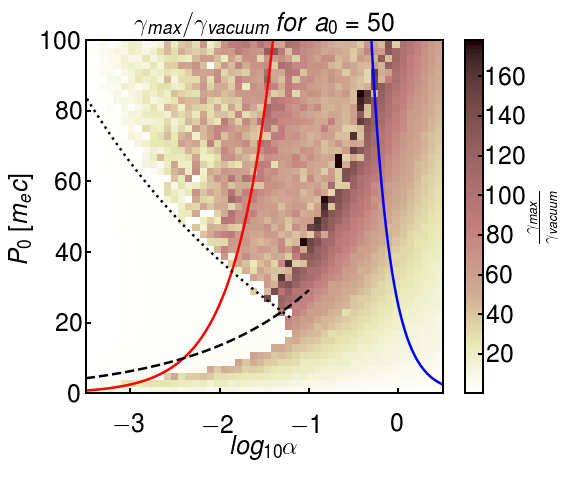

In [29]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
#import os
#import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
#from colour import Color

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
		'weight' : 'normal',
        'size'   : 25,
	   }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
#print 'electric field unit: '+str(exunit)
#print 'magnetic field unit: '+str(bxunit)
#print 'density unit nc: '+str(denunit)



ex=np.loadtxt('./txt/enhance.txt')
axis_b=np.loadtxt('./txt/axis_b.txt')
axis_a=np.loadtxt('./txt/axis_p.txt')
x,y=np.meshgrid(axis_b,axis_a)
ex=ex*(50.0**2/2.0)/(50.0**2/(y+2.0))
#ex=ex*(150**2.0+1.0)/(200.0**2+1.0)
levels = np.linspace(np.min(ex.T), np.max(ex.T), 40)
#levels = np.linspace(0.0, 3.1, 40)
#plt.contourf(x, y, ex, levels=levels, cmap=cm.pink_r, antialiased=False)
#plt.pcolormesh(x, y, ex, norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=np.min(ex.T), vmax=np.max(ex.T)), cmap=cm.pink_r)
norm = MidpointNormalize(midpoint=50)
plt.pcolormesh(x, y, ex.T, norm=norm, cmap=cm.pink_r)

plt.axis([x.min(), x.max(), y.min(), y.max()])
#### manifesting colorbar, changing label and axis properties ####
cbar=plt.colorbar()#ticks=[np.min(ex), -eee/2, 0, eee/2, np.min()])
cbar.set_label(r'$\frac{\gamma_{max}}{\gamma_{vacuum}}$',fontdict=font)        
a0=50.0
alpha=np.linspace(-3.5,0.5,501)

p0=(0.01*a0/2.0/(10.0**alpha))**2
p1=(0.05*a0/2.0/(10.0**alpha))**2
p2=(0.20*a0/2.0/(10.0**alpha))**2
p3=(0.35*a0/2.0/(10.0**alpha))**2

#plt.plot(alpha,p0,'-r',linewidth=1.5,label=r'$B_{max}=0.01a_0$')
#plt.plot(alpha,p1,'-g',linewidth=1.5,label=r'$B_{max}=0.05a_0$')
plt.plot(alpha,p2,'-b',linewidth=2.5,label=r'$B_{max}=0.20a_0$')
#plt.plot(alpha,p3,'-b',linewidth=3.5,label=r'$B_{max}=0.35a_0$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 12})

p0=(2*np.pi*2.5)**2*(10.0**alpha)
p1=(2*np.pi*5.0)**2*(10.0**alpha)
p2=(2*np.pi*8.0)**2*(10.0**alpha)
#p3=(2*np.pi*20.0)**2*(10.0**alpha)

#plt.plot(alpha,p0,':r',linewidth=2.5,label=r'$y_{max}=2.5\ [micron]$')
#plt.plot(alpha,p1,':g',linewidth=2.5,label=r'$y_{max}=5.0\ [micron]$')
plt.plot(alpha,p2,'-r',linewidth=2.5,label=r'$y_{max}=8.0\ [micron]$')
#plt.plot(alpha,p3,':b',linewidth=3.5,label=r'$y_{max}=20.0\ [micron]$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 12})

x=np.linspace(-3.5,-1.,501)
a0=50.0
y=(10.0**x*(a0/0.1)**2)**0.3333
plt.plot(x,y,'--k',linewidth=2.5, label=r'$p_0=4.6a_0^\frac{2}{3}\alpha^\frac{1}{3}$')
#plt.legend(loc='best',framealpha=0.0, prop={'size': 8})
#plt.legend(loc=(0.02,0.15),framealpha=0.0, prop={'size': 8})

p0=np.linspace(21.5,201,1001)
a0=50.0
k=100
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':k',linewidth=2.5)


plt.xlabel(r'$log_{10}\alpha$',fontdict=font)
plt.ylabel(r'$P_{0}\ [m_ec]$',fontdict=font)
plt.xticks(fontsize=25); plt.yticks(fontsize=25);
plt.title(r'$\gamma_{max}/\gamma_{vacuum}\ for\ a_0=50$')
plt.xlim(-3.5,0.5)
plt.ylim(0,100)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


fig = plt.gcf()
fig.set_size_inches(8, 6.5)
#fig.set_size_inches(5, 4.5)
#fig.savefig('./txt/figure_ttt.png',format='png',dpi=1280)
#plt.close("all")



(0, 200)

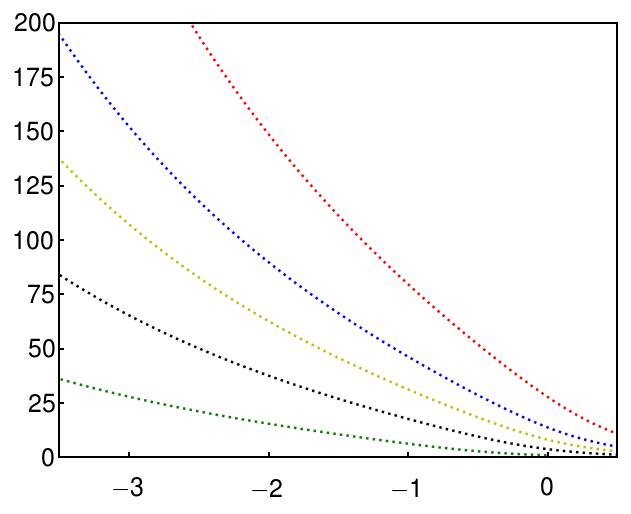

In [36]:
p0=np.linspace(1,201,1001)
a0=25.0
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':g',linewidth=2.5)

a0=50.0
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':k',linewidth=2.5)

a0=75.0
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':y',linewidth=2.5)

a0=100.0
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':b',linewidth=2.5)

a0=150.0
#alpha=p0*(1+p0**2/4+a0**2/2.0)**2/(2*p0*p0/2*k*p0/a0)**2
#alpha=((0.025*a0*(1+a0**2))/(1+a0**2+1.5*p0**2))**2/p0
alpha=(0.04*(a0**2/2)/(1+0.5*a0**2+2*p0**2))**2*a0**2/p0
#alpha=(0.0001*a0**2/p0)
alpha=np.log10(alpha)
plt.plot(alpha,p0,':r',linewidth=2.5)

plt.xlim(-3.5,0.5)
plt.ylim(0,200)

/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


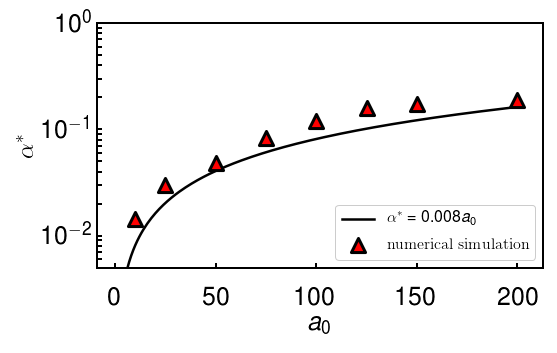

In [20]:
%matplotlib inline
#import sdf
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
import matplotlib as mpl
mpl.style.use('https://raw.githubusercontent.com/Michael-Gong/DLA_project/master/style')
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal
from optparse import OptionParser
#import os
#import os
from mpl_toolkits.mplot3d import Axes3D
import random
from mpl_toolkits import mplot3d
from matplotlib import rc
import matplotlib.transforms as mtransforms
#from colour import Color

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

font = {'family' : 'helvetica',
        'color'  : 'black',
		'weight' : 'normal',
        'size'   : 25,
	   }

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

######## Constant defined here ########
pi        =     3.1415926535897932384626
q0        =     1.602176565e-19 # C
m0        =     9.10938291e-31  # kg
v0        =     2.99792458e8    # m/s^2
kb        =     1.3806488e-23   # J/K
mu0       =     4.0e-7*pi       # N/A^2
epsilon0  =     8.8541878176203899e-12 # F/m
h_planck  =     6.62606957e-34  # J s
wavelength=     1.0e-6
frequency =     v0*2*pi/wavelength

exunit    =     m0*v0*frequency/q0
bxunit    =     m0*frequency/q0
denunit    =     frequency**2*epsilon0*m0/q0**2
#print 'electric field unit: '+str(exunit)
#print 'magnetic field unit: '+str(bxunit)
#print 'density unit nc: '+str(denunit)


rho = 0.04
kappa = 4.6

a0 = np.linspace(1,200,200)
alpha = (rho/kappa)**1.5*a0

plt.plot(a0,alpha,'-k',linewidth=2.5, label=r'$\alpha^*=0.008a_0$',zorder=1)
plt.yscale('log')


sim_a0=np.array([10.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 200])
sim_al=-2+np.array([2.0, 6.0, 8.5, 11.5, 13.5, 15.0, 15.5, 16.0])*0.08
plt.scatter(sim_a0,10**sim_al,c='red',marker='^',s=200,label='numerical simulation',edgecolors='black', linewidth=3, alpha=1, zorder=2)

plt.legend(loc='lower right',fontsize=16,framealpha=1.0)
plt.xlabel(r'$a_0$',fontdict=font)
plt.ylabel(r'$\alpha^*$',fontdict=font)
plt.xticks(fontsize=25); plt.yticks(fontsize=25);
#plt.title(r'$\gamma_{max}/\gamma_{vacuum}\ for\ a_0=50$')
#plt.xlim(-3.5,0.5)
plt.ylim(0.005,1e0)
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)


fig = plt.gcf()
fig.set_size_inches(8, 4.5)
#fig.set_size_inches(5, 4.5)
fig.savefig('./txt/figure_alpha_star.png',format='png',dpi=160)
#plt.close("all")


In [4]:
(0.04/4.6)**1.5

0.0008108737462959251